# Required Libraries

In [160]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

### CSV

In [161]:
url = 'https://raw.githubusercontent.com/YungLxrdX/Projects/main/Page%20View%20Time%20Series%20Visualizer/data/fcc-forum-pageviews.csv'
df = pd.read_csv(url)
df.date = pd.to_datetime(df.date)
df.set_index('date', inplace=True)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [162]:
df.dtypes

value    int64
dtype: object

### Data cleaning

In [163]:
df = df[(df.value <= df.value.quantile(0.975))
        &(df.value >= df.value.quantile(0.025))]

### Visualization 1

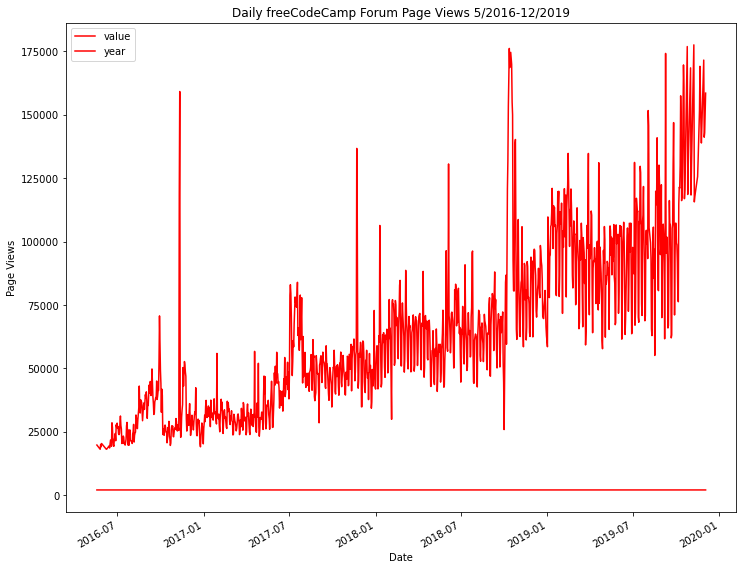

In [212]:
fig, ax = plt.subplots(figsize = (12,10))
df.plot(kind = 'line', color = 'red', ax= ax)
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_ylabel('Page Views')
ax.set_xlabel('Date')
fig.savefig('line_plot.png')

### Visualization 2

In [173]:
df['year'] = df.index.year
df['month'] = df.index.month_name()

In [174]:
df_bar = df.groupby(['year', 'month'], as_index=False).mean()
df_bar.head()
df_bar.month.unique()

array(['August', 'December', 'July', 'June', 'May', 'November', 'October',
       'September', 'April', 'February', 'January', 'March'], dtype=object)

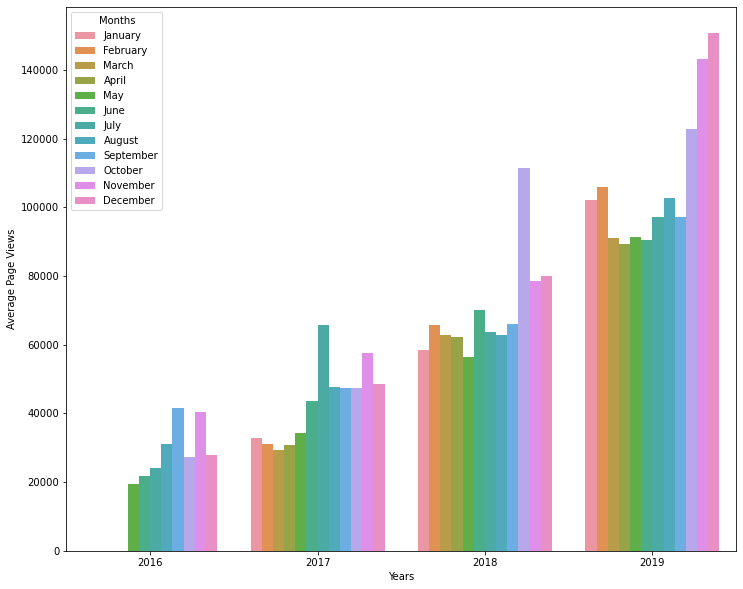

In [175]:

fig, ax = plt.subplots(figsize = (12,10))
hue_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
             'August', 'September', 'October', 'November', 'December',]
sns.barplot(data=df_bar, x='year', y='value', hue = 'month', hue_order=hue_order)
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
ax.legend(title = 'Months', loc='upper left')

### Visualization 3

In [176]:
df_box = df.copy()
df_box.reset_index(inplace = True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [192]:
ordr = ['Jan', 'Feb', 'Mar', 'Apr',
        'May', 'Jun', 'Jul', 'Aug',
        'Sep', 'Oct', 'Nov', 'Dec']

array(['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan',
       'Feb', 'Mar', 'Apr'], dtype=object)

Text(0, 0.5, 'Page Views')

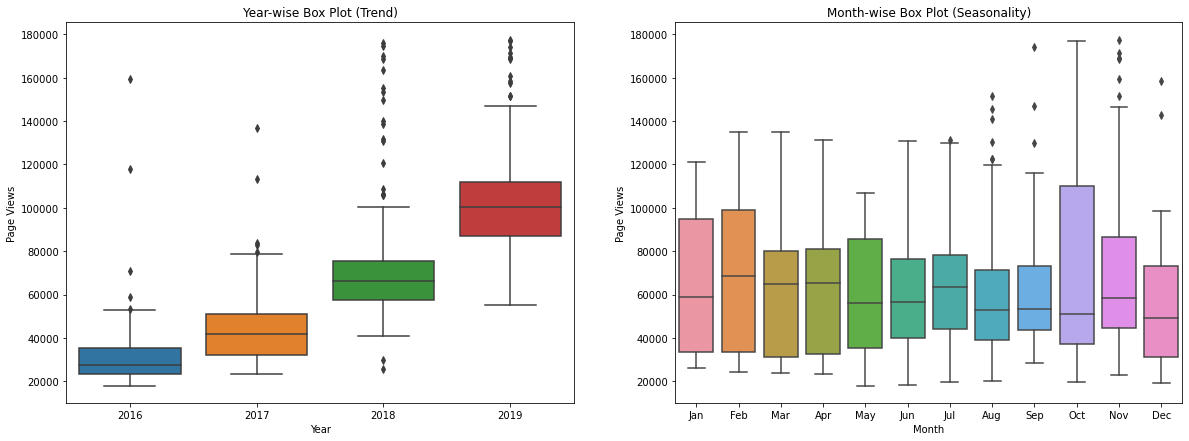

In [203]:
ordr = ['Jan', 'Feb', 'Mar', 'Apr',
        'May', 'Jun', 'Jul', 'Aug',
        'Sep', 'Oct', 'Nov', 'Dec']
fig, axes = plt.subplots(1, 2, figsize = (20,7))
sns.boxplot(data=df_box, x= 'month', y= 'value', ax= axes[1], order=ordr)
sns.boxplot(data=df_box, x= 'year', y='value', ax= axes[0])
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[1].set_xlabel('Month')
axes[0].set_ylabel('Page Views')
axes[1].set_ylabel('Page Views')